## Exploratory Analysis and Data Visualization in Python of Bike Sharing Data

Step #1: Install Libraries onto the colab interface:

In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Step #2: Download the Data Set onto Colab:

In [ ]:
ur3 =  'http://bit.ly/bike-data'
bike_rentals = pd.read_csv(ur3)

Step #3: Calculate the dimensions(rows and columns) in the dataset.

In [ ]:
bike_rentals.shape

(731, 14)

Step#4: List the columns in the dataset along with their data types.

In [ ]:
bike_rentals.dtypes

ID                      int64
date                   object
yr                      int64
mnth                    int64
weekday                 int64
season                  int64
holiday                 int64
working_day             int64
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
casual_rentals          int64
registered_rentals      int64
dtype: object

Step#5: Preview the first 5 records of the dataset.

In [ ]:
bike_rentals.head(5)

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518


In [ ]:
bike_rentals['casual_rentals'].head(5)

0    331
1    131
2    120
3    108
4     82
Name: casual_rentals, dtype: int64

Step #6: Create a new column called "total_rentals" that sums the "casual_rentals" and "registered_rentals" columns.

In [ ]:
bike_rentals['total_rentals'] = bike_rentals['casual_rentals'] + bike_rentals['registered_rentals']

Step #7: Confirm this new column was calculated correctly by previewing a few records.

In [ ]:
bike_rentals.head(5)

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
bike_rentals[bike_rentals['date']=="1/5/2011"]['total_rentals']

4    1600
Name: total_rentals, dtype: int64

Step #8: Generate descriptive stats for the numeric columns in the dataset.


In [ ]:
bike_rentals.describe()

,ID,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,2.997264,2.496580,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,2.004787,1.110807,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,3.000000,3.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,5.000000,3.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,6.000000,4.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
bike_rentals['total_rentals'].std()

1937.2114516187678

 **Step #9: Create a pivot tablethat has "yr"and"mnth" as indices (in that order) 
and that sums and averages "total_rentals".**

In [ ]:
bike_rentals_pivot_table= pd.pivot_table(bike_rentals,index=['yr','mnth'],values='total_rentals',aggfunc=[np.sum,np.mean])
bike_rentals_pivot_table.head(8)

sum          mean
        total_rentals total_rentals
yr mnth                            
0  1            38189   1231.903226
   2            48215   1721.964286
   3            64045   2065.967742
   4            94870   3162.333333
   5           135821   4381.322581
   6           143512   4783.733333
   7           141341   4559.387097
   8           136691   4409.387097

Step #10: Determine whether or not there are any missing values in the dataset. If there are any missing values, drop the rows containing those values.

In [ ]:
bike_rentals = bike_rentals.dropna()
print(bike_rentals.isnull().sum())

ID                    0
date                  0
yr                    0
mnth                  0
weekday               0
season                0
holiday               0
working_day           0
temp                  0
atemp                 0
hum                   0
windspeed             0
casual_rentals        0
registered_rentals    0
total_rentals         0
dtype: int64


**Step #11: Generate a histogram to visualize the distribution of data in the "total_rentals" column.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


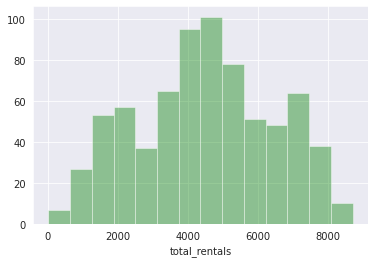

In [ ]:
sns.distplot(bike_rentals['total_rentals'], kde=False, color = 'green');

**Step #12: Generate a scatterplottot to show the relationship between "casual_rentals" and "registered_rentals" on a daily basis.**

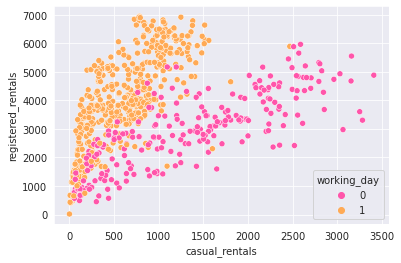

In [ ]:
sns.scatterplot(x="casual_rentals", y="registered_rentals", hue="working_day", data=bike_rentals, palette="spring");

Step #13: Generate a swarmplot to explore the total rentals by season.
The "season" should be on the x-asis and "total_rentals" on the y-axis.

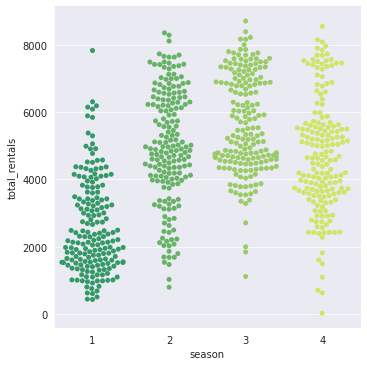

In [ ]:
sns.catplot(x="season", y="total_rentals", kind="swarm", data=bike_rentals,palette="summer");

**Step #14: Generate a line plot that shows average daily rentals by month and split the lines by year. The "mnth" should on the x-axis, the "total_rentals" on the y-axis, and there should be a line for each value in the "yr" column.**

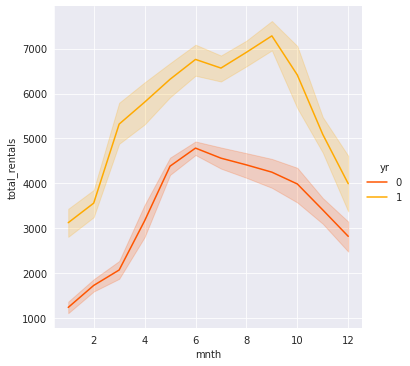

In [ ]:
sns.relplot(x="mnth", y="total_rentals", hue="yr", kind="line", data=bike_rentals,palette="autumn");

**Step #15: Generate a pairplot to show the relationship between "total_rentals" and the weather indicators ("temp", "atemp", "hum", and "windspeed"), which are continuous variables.**

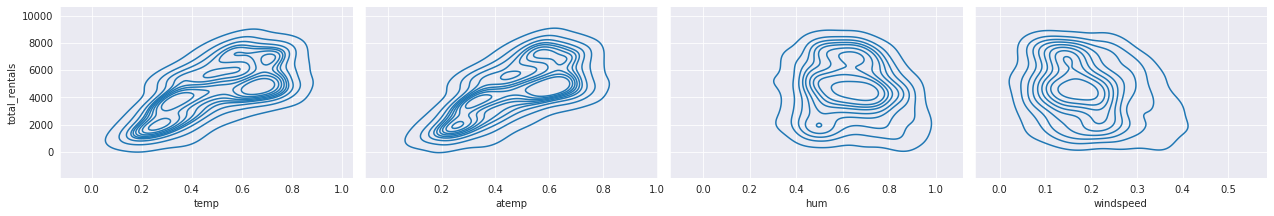

In [ ]:
sns.pairplot(bike_rentals,x_vars=["temp","atemp","hum","windspeed"],y_vars=["total_rentals"], kind="kde",height=3, aspect=1.5);

**Step #16: Use a heatmap to visualize the correlation between "total_rentals" and the weather indicators ("temp", "atemp", "hum", and "windspeed"), which are continuous variables.**

In [ ]:
bike_rentals[['temp','atemp','hum','windspeed','total_rentals']].corr()

,temp,atemp,hum,windspeed,total_rentals
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
total_rentals,0.627494,0.631066,-0.100659,-0.234545,1.000000


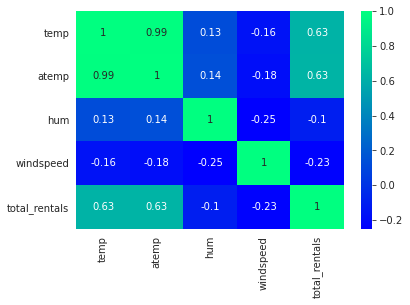

In [ ]:
sns.heatmap(bike_rentals[['temp','atemp','hum','windspeed','total_rentals']].corr(),cmap='winter',annot=True);

**Step #17: In preparation for linear regression (where you will be predicting "total_rentals"), separate the dependent variable (y) and independent variables (X), and only include those independent variables shown in the heatmap that have a correlation coefficient (r) with respect to "total_rentals" that is greater than 0.5 or less than -0.5.Also, do NOT include "atemp", since it is highly correlated with another independent variable ("temp") and thus not independent.**

In [ ]:
X=bike_rentals[["temp"]]
Y=bike_rentals["total_rentals"]

Step #18: Split the data into training and test sets. Put 25% of the data into the test set.(Use the "train_test_split" function.)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

Step#19: Train ("fit") the linear regression model using the training data.(Use the "fit" function.)

In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Step #20: Identify the intercepts and coefficientsof the regression model.(Use "intercept_" and "coef_".)

In [ ]:
print(model.intercept_)
print(model.coef_)

1327.930810368468
[6463.96764523]


Step #21: Use the regression model to predict “total_rentals” when "temp" = 0.30.(Use the "predict" function.)

In [ ]:
new_X = [[0.3]]
model.predict(new_X)

array([3267.12110394])

Step #22: Use the regression model to predict total bike rentals in the test data. Store your predictions in a variable called "y_pred".

In [ ]:
Y_pred = model.predict(X_test)
bike_rentals_compare = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
bike_rentals_compare.head(10)

,Actual,Predicted
196,5923,5766.524081
187,4592,6175.906544
14,1248,2836.187773
31,1360,2570.137329
390,4075,3536.455244
319,1817,4279.811523
299,2659,4365.995604
702,6234,4252.876170
462,6857,4155.916655
27,1167,2643.206019


Step #23: Generate the R squared.(Use the "metrics.r2_score" function.)

In [ ]:
metrics.r2_score(Y_test,Y_pred)

0.37540464616240454

**Extra Credit:** Improved Regression Model

Step #1: Before splitting the data, encode “season” using panda’s get_dummies function. Preview the first few records in the dataframe to confirm the changes.

In [ ]:
bike_rentals = pd.get_dummies(bike_rentals, columns= ["season"])


In [ ]:
bike_rentals.head(5)

,ID,date,yr,mnth,weekday,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals,season_1,season_2,season_3,season_4
0,1,1/1/2011,0,1,6,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0,0,0
1,2,1/2/2011,0,1,0,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0,0,0
2,3,1/3/2011,0,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,0,0,0
3,4,1/4/2011,0,1,2,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,0,0,0
4,5,1/5/2011,0,1,3,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,0,0,0


Step #2: Generate a new correlation matrix with all variables using “.corr()”.

In [ ]:
bike_rentals[['temp','atemp','hum','windspeed','season_1','season_2','season_3','season_4','total_rentals']].corr()

,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,total_rentals
temp,1.000000,0.991702,0.126963,-0.157944,-0.619800,0.155424,0.678471,-0.224793,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.625061,0.163661,0.655956,-0.204904,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.181336,-0.003854,0.023101,0.162732,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,0.178154,0.097513,-0.139732,-0.135466,-0.234545
season_1,-0.619800,-0.625061,-0.181336,0.178154,1.000000,-0.332716,-0.337549,-0.325466,-0.563094
season_2,0.155424,0.163661,-0.003854,0.097513,-0.332716,1.000000,-0.341267,-0.329051,0.146197
season_3,0.678471,0.655956,0.023101,-0.139732,-0.337549,-0.341267,1.000000,-0.333831,0.346487
season_4,-0.224793,-0.204904,0.162732,-0.135466,-0.325466,-0.329051,-0.333831,1.000000,0.065593
total_rentals,0.627494,0.631066,-0.100659,-0.234545,-0.563094,0.146197,0.346487,0.065593,1.000000


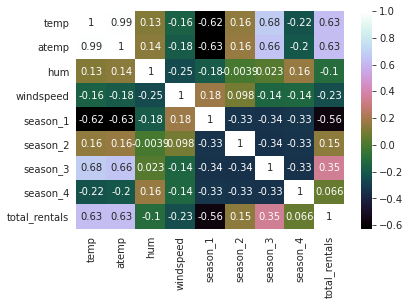

In [ ]:
sns.heatmap(bike_rentals[['temp','atemp','hum','windspeed','season_1','season_2','season_3','season_4','total_rentals']].corr(),cmap='cubehelix',annot=True);

Step #3: Update your model to only include variables that have a correlation with“total_rentals” that is > 0.5 or < -0.5.

In [ ]:
bike_rentals_correlation = bike_rentals.corr()
bike_rentals_correlation['total_rentals']

ID                    0.628830
yr                    0.566710
mnth                  0.279977
weekday               0.067443
holiday              -0.068348
working_day           0.061156
temp                  0.627494
atemp                 0.631066
hum                  -0.100659
windspeed            -0.234545
casual_rentals        0.672804
registered_rentals    0.945517
total_rentals         1.000000
season_1             -0.563094
season_2              0.146197
season_3              0.346487
season_4              0.065593
Name: total_rentals, dtype: float64

In [ ]:
X=bike_rentals[[ "yr","temp","season_1"]]
Y=bike_rentals["total_rentals"]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(model.intercept_)
print(model.coef_)

1575.3122121066099
[ 2052.99528178  4491.85668833 -1255.96306824]


In [ ]:
new_X = [[0,0.3,1]]
model.predict(new_X)

array([1666.90615036])

In [ ]:
Y_pred = model.predict(X_test)
bike_rentals_compare = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
bike_rentals_compare.head(10)

,Actual,Predicted
196,5923,4659.721969
187,4592,4944.204728
14,1248,1367.447541
31,1360,1182.567211
390,4075,3907.063625
319,1817,3626.594930
299,2659,3686.484856
702,6234,5660.872645
462,6857,5593.494795
27,1167,1233.343159


In [ ]:
metrics.r2_score(Y_test,Y_pred)

0.7535292582341668